CNN适合处理二维大感知数据,RNN适合处理语音/文字等一维的字符序列.
文本与图像的最大区别在于:1)文本数据更强调文字序列中前后元素之间的关系.2)文本序列属于变长数据.

##  NLP:机器翻译\智能对话\文字语义理解
听:语音识别(Speech to Text,STT),从音频到文本的转换;
说:语音合成(Text to Speech,TTS),实现文本到音频的转换;
读:文本理解(Text Understanding),实现文本到语义的转换;
写:文本生成(Text Generation),实现语义到文本的转换.

文本数据易保存\噪声小\自带标签等特性,适合用于语义分析;
语音数据存储量大\噪声处理复杂\数据类别标记困难,导致语音识别和合成更侧重于信号分类与还原.



##   NLP:文本理解和文本生成问题
文本理解即文本语义分析,是指基于词法\语法等信息,让计算机自动从文本中挖掘有用的信息,并帮助人们理解文本内容的智能算法.典型的应用包括:文本分类\情感分析\自动文摘.

文本生成即让计算机自动输出符合人类语言习惯的文本,典型的应用场景如机器翻译\对话机器人,甚至人口智能写作.

传统的前馈神经网络(Feed-forward Neural Network,FNN)和CNN不适合处理文本数据的原因在于:文本数据是变长的,而FNN和CNN输入输出的长度是固定的.



## RNN(Recurrent Neural Network)
在循环神经网络中,每一个输出元素的生成都是基于同一个网络,这样就可以简单地输出变长结果,输出序列的每个元素都是之前位置的输出元素所组成的函数,这就保持了序列元素的依赖关系.

RNN就是在传统神经网络的基础上加入了记忆的成分．RNN模型把序列($x_1,x_2,...,x_m$)看作一系列随着时间步长(time step)递进的事件序列.这里的时间步长并不是真实世界中的时间,而是指序列中的位置.传统神经网络中,$o_i,o_j$是不相关的,但在RNN中,对当前时刻状态的计算还依赖于前一步的计算结果,如,$o_2$的计算实际上同时基于$x_2,o_1$,对于时刻t来说,上一时刻的状态表示为$h_{t-1}$,可以说$h_{t-1}$编码记录了$x_t$的前缀序列$(x_1,x_2,...,x_t-1)$的信息;当对t时刻的输入$x_t$进行计算时,循环神经网络综合了当前时刻输入$x_t$与前一个时刻的'记忆'$h_{t-1}$,一起得到t时刻的状态.
RNN的 <font face='黑体',size=4,color=#0099ff> 前向传播 </font>可以表示为:

$a_t=b+\boldsymbol{W}h_{t-1}+\boldsymbol{U}x_t \\ h_{t-1}=tanh(a_t) \\ o_t=c+\boldsymbol{V}h_t \\ \hat{y_t}=softmax(o_t) \\ $

其中,$\hat{y_t}$为经过归一化后的预测概率.
参数贡献在RNN中也起到了至关重要的作用,对每一个时刻U,V,W并没有变化,而是使用了同一组参数.参数共享的意义在于,在一段文本中,部分重要的信息可能出现在序列的任何位置上,甚至同时出现在多个位置上,如:赵喜欢运动,运动是赵的最爱,无论运动出现在哪个位置,都是序列的关键信息.正是由于参数共享的作用,RNN可以处理任意长度的序列,只要序列的元素按顺序一个个地传入网络.

Recursive Neural Network,通过构造参数共享的树状结构处理序列数据.递归神经网络一般采用固定的平衡二叉树结构的方式构造,递归的含义在于树状结构网络结构中的重复子结构模块之间实施了参数共享.如果说循环神经网络是在时间维度上实现参数共享,那么递归神经网络是在空间维度上进行共享.


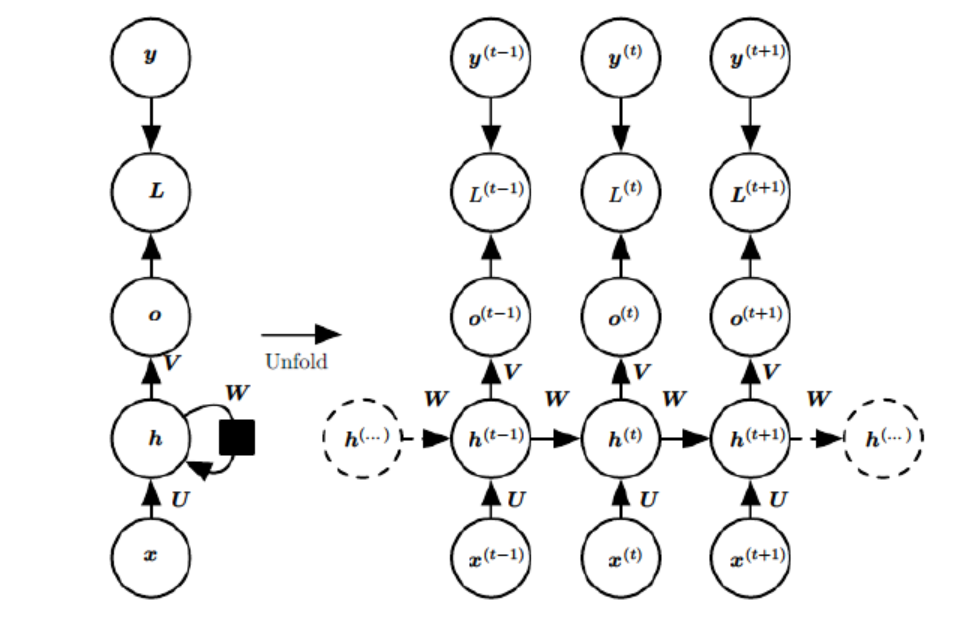

<img src='attachment:image.png',width="500",height='400'>

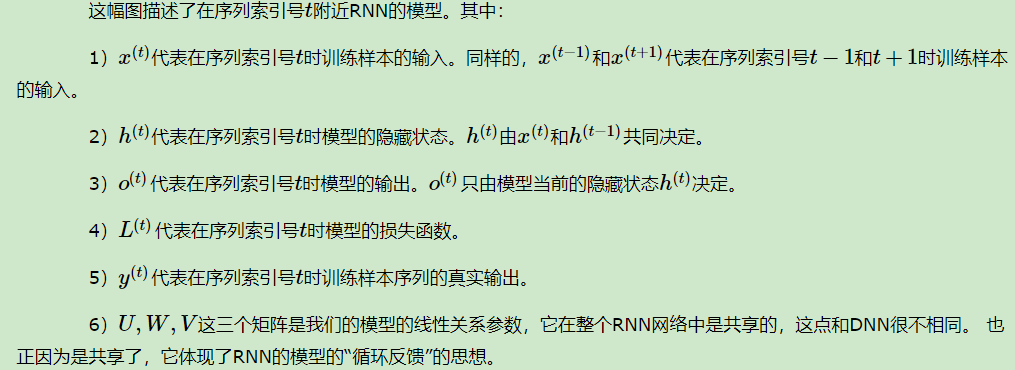

## BPTT算法
RNN反向传播算法的思路和DNN是一样的，即通过梯度下降法一轮轮的迭代，得到合适的RNN模型参数U,W,V,b,c。由于我们是基于时间反向传播，所以RNN的反向传播有时也叫做BPTT(back-propagation through time)。当然这里的BPTT和DNN也有很大的不同点，即这里所有的U,W,V,b,c在序列的各个位置是共享的，反向传播时我们更新的是相同的参数。
反向传播的目的是根据前向传播得到代价函数L,计算参数矩阵W,U,V各个值的梯度,以便应用随机梯度下降算法得到最合适的参数值.
以第二次输入$x_2$对应的损失函数$L_2$为例:

$\frac{\partial L_2}{\partial W}=\frac{\partial L_2}{\partial \hat{y_2}}\cdot \frac{\partial \hat{y_2}}{\partial h_2}\cdot \frac{\partial h_2}{\partial W}$
由于$h_2=tanh(Ux_2+Wh_1)$,得到:

$$\frac{\partial L_2}{\partial W}=\sum_{k=0}^2{\frac{\partial L_2}{\partial \hat{y_2}}\cdot \frac{\partial \hat{y_2}}{\partial h_2} \cdot \frac{\partial h_2}{\partial h_k} \cdot \frac{\partial h_k}{\partial W} }$$

BPTT与标准反向传播算法基本相同, 最主要的差异是由于在RNN网络中,每一层都共享参数变量W,所以在计算梯度的时候,每一层所得的W的梯度都需要累加在一起,以保证每一层计算所得的误差都得到梯度累加在一起,以保证每一层计算所得的误差都得到一定程度的矫正. 


## 灵活的RNN结构
从输入和输出是否为变长的结构可以分为:one to one, one to many, many to one, many to many, many to many(sync),one 代表定长,many代表变长.sync代表输出与输入的长度一致,但输入是变长.

one to one,如文本分类,对于给定的文章,基于人工设计的抽取算法得到文章的特征向量$(f_1,f_2...f_n)$,将特征向量输入网络,计算出文章所属的c个分类中每个类别的概率$(p_1,p_2,...,p_3)$,其中n和c都是确定的.

one to many,如单词释义.

many to one,文本情感分析,根据文本内容给出积极情绪和消极情绪的概率.

many to many,encoder-decoder框架,它的特点是输入序列数据经过编码器网络得到内部表示后,再基于这个表示通过解码器网络生成新的序列.输入和输出都是变长,且长度可以不同.如机器翻译.

many to many(sync),输入和输出的元素一一对应,输入数据规模不定,但每一个输入都有对应输出.如,文本序列词性标注.




In [43]:
## tensorflow实现正弦序列预测
import random
import numpy as np

length=10
def bulid_data(n):
    xs=[]
    ys=[]
    for i in range(2000):
        random.seed(1234)
        k=random.uniform(1,50)#生成一个0-50之间的随机数,等同于np.random.uniform(1,50,1)
        
        #x[i]=sin(k+i),i=0,1....,n-1
        #y[i]=sin(k+n)
        x=[[np.sin(k+j)] for j in range(n)]#生成n个正弦值
        y=[np.sin(k+n)]#生成一个正弦值
        
        xs.append(x)#将n个正弦值加入列表,共2000个即2000*n个数
        ys.append(y)#将y加入列表,共2000个数
    train_x=np.array(xs[0:1500])#取出xs的前1500个序列作为特征
    train_y=np.array(ys[0:1500])#对应的500个标签
    test_x=np.array(xs[1500:])
    test_y=np.array(ys[1500:])
    return (train_x,train_y,test_x,test_y)
train_x,train_y,test_x,test_y=bulid_data(length)
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)


(1500, 10, 1) (1500, 1) (500, 10, 1) (500, 1)


In [78]:
import tensorflow as tf
from tensorflow.contrib import rnn

tf.reset_default_graph()


vector_size=1#序列向量,维度/channel为1
batch_size=20


X=tf.placeholder(tf.float32,shape=[None,length,vector_size])#为训练样本声明占位符,None为batch_size
Y=tf.placeholder(tf.float32,shape=[None,vector_size])#None为batch_size

W=tf.Variable(tf.random_normal([length,vector_size],stddev=0.01))#shape为[10,1],均值为0,std为0.01
B=tf.Variable(tf.random_normal([vector_size],stddev=0.01))

def seq_predict_model(X,w,b,length,batch_size,vector_size):
    #X.shape=[batch_size,time_step_size,vector_size]
    
    X=tf.transpose(X,[1,0,2])#将其转置为[length,batch_size,vector_size]
    X=tf.reshape(X,[-1,vector_size])#将其转换为[length*batch_size,vector_size]
    X=tf.split(X,length,0)#将其拆分为length个batch_size*vector_size的数组
    print(len(X))
    
    cell=rnn.BasicRNNCell(num_units=length)#一个RNNCell包含10个单元,即隐层的状态数目为10,包含10个神经元,必须与特征数一致
    #rnn.BasicLSTMCell(num_units=length,forget_bias=1.0,state_is_tuple=True)
    initial_state=tf.zeros([batch_size,cell.state_size])#初始化,state_size为10,
    output,_state=rnn.static_rnn(cell,X,initial_state=initial_state)#创建RNN网络,X为输入,initital_state为初始状态
    return tf.matmul(output[-1],w)+b
pred_y=seq_predict_model(X,W,B,length,vector_size,batch_size)

loss=tf.square(tf.subtract(Y,pred_y))
train_op=tf.train.GradientDescentOptimizer(0.001).minimize(loss)


10


In [76]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(50):
        for end in range(batch_size,len(train_x),batch_size):
            begin=end-batch_size
            x_value=train_x[begin:end]
            y_value=train_y[begin:end]
            
            sess.run(train_op,feed_dict={X:x_value,Y:y_value})
         #随机选择样本,必须以batch_size为单位   
        test_indices=np.arange(len(test_x))
        np.random.shuffle(test_indices)
        test_indices=test_indices[0:batch_size]
        x_value=test_x[test_indices]
        y_value=test_y[test_indices]

        val_loss=np.mean(sess.run(loss,feed_dict={X:x_value,Y:y_value}))
        print('run %s' %i,val_loss)

run 0 3.5527137e-13
run 1 1.4210855e-14
run 2 1.4210855e-14
run 3 1.4210855e-14
run 4 1.4210855e-14
run 5 1.4210855e-14
run 6 1.4210855e-14
run 7 1.4210855e-14
run 8 1.4210855e-14
run 9 1.4210855e-14
run 10 1.4210855e-14
run 11 1.4210855e-14
run 12 1.4210855e-14
run 13 1.4210855e-14
run 14 0.0
run 15 0.0
run 16 0.0
run 17 0.0
run 18 0.0
run 19 0.0
run 20 0.0
run 21 0.0
run 22 0.0
run 23 0.0
run 24 0.0
run 25 0.0
run 26 0.0
run 27 0.0
run 28 0.0
run 29 0.0
run 30 0.0
run 31 0.0
run 32 0.0
run 33 0.0
run 34 0.0
run 35 0.0
run 36 0.0
run 37 0.0
run 38 0.0
run 39 0.0
run 40 0.0
run 41 0.0
run 42 0.0
run 43 0.0
run 44 0.0
run 45 0.0
run 46 0.0
run 47 0.0
run 48 0.0
run 49 0.0


## LSTM模型
RNN的结构决定了它的输入元素的记忆与距离呈正相关,即RNN不能很好地处理长期依赖问题．RNN结构本质上是很多层相同非线性函数的嵌套，若忽略激活函数和输入向量，状态$h_t$可以表示成:$h_t=\boldsymbol{W}h_{t_1}=\boldsymbol{W}^2h_{t-1}=...=\boldsymbol{W}^th_0$,若对参数矩阵$\boldsymbol{W}$进行特征分解,$\boldsymbol{W=Q\Lambda Q^{-1}}$,则状态节点$h_t$可表示为$h_t=\boldsymbol{Q^{-1}\Lambda^tQ}h_0$,若特征值小于1,则$h_t$特征值会快速降为0,若特征值大于1,则趋于爆炸.

长短记忆网络(Long Short Term Memory Network,LSTM)是循环神经网络的改进,Sepp Hochreiter和Jurgen Schmidhuber于1997年提出.主要改进是多出了三个门控制器:输入门(input gate),输出门(output gate)和遗忘门(forget gate).三个门控制器的结构都相同,主要由sigmoid函数和点积操作构成,由于sigmoid函数的取值范围为[0,1],所以门控制器描述了信息能够通过的比例,sigmoid函数取值为0的时候表示没有信息通过,或者理解为所有记忆都遗忘,取1则分支所有记忆都保留.
LSTM模型在所有短期记忆单元$h_t$的基础上,增加一个记忆单元$C_t$来保持长期记忆.
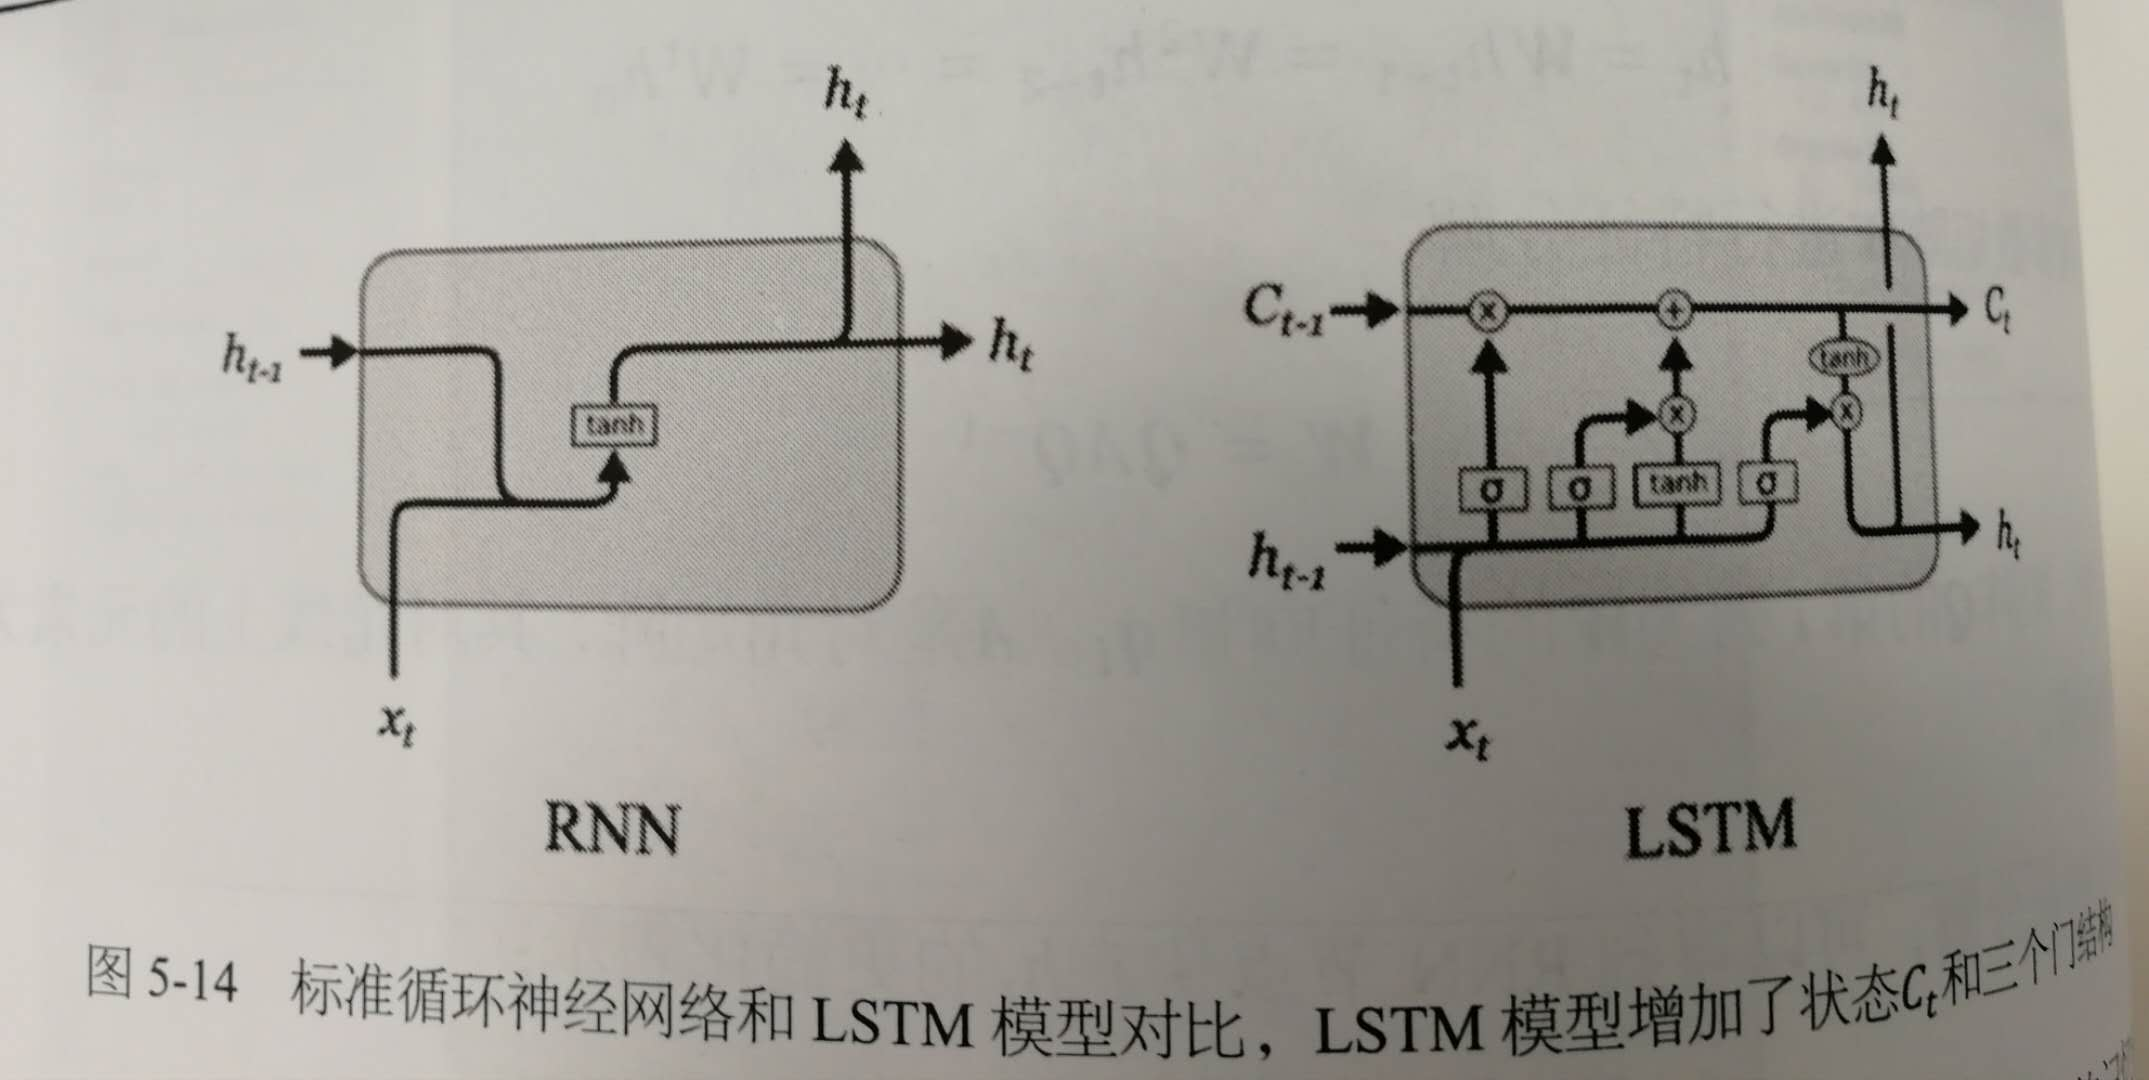



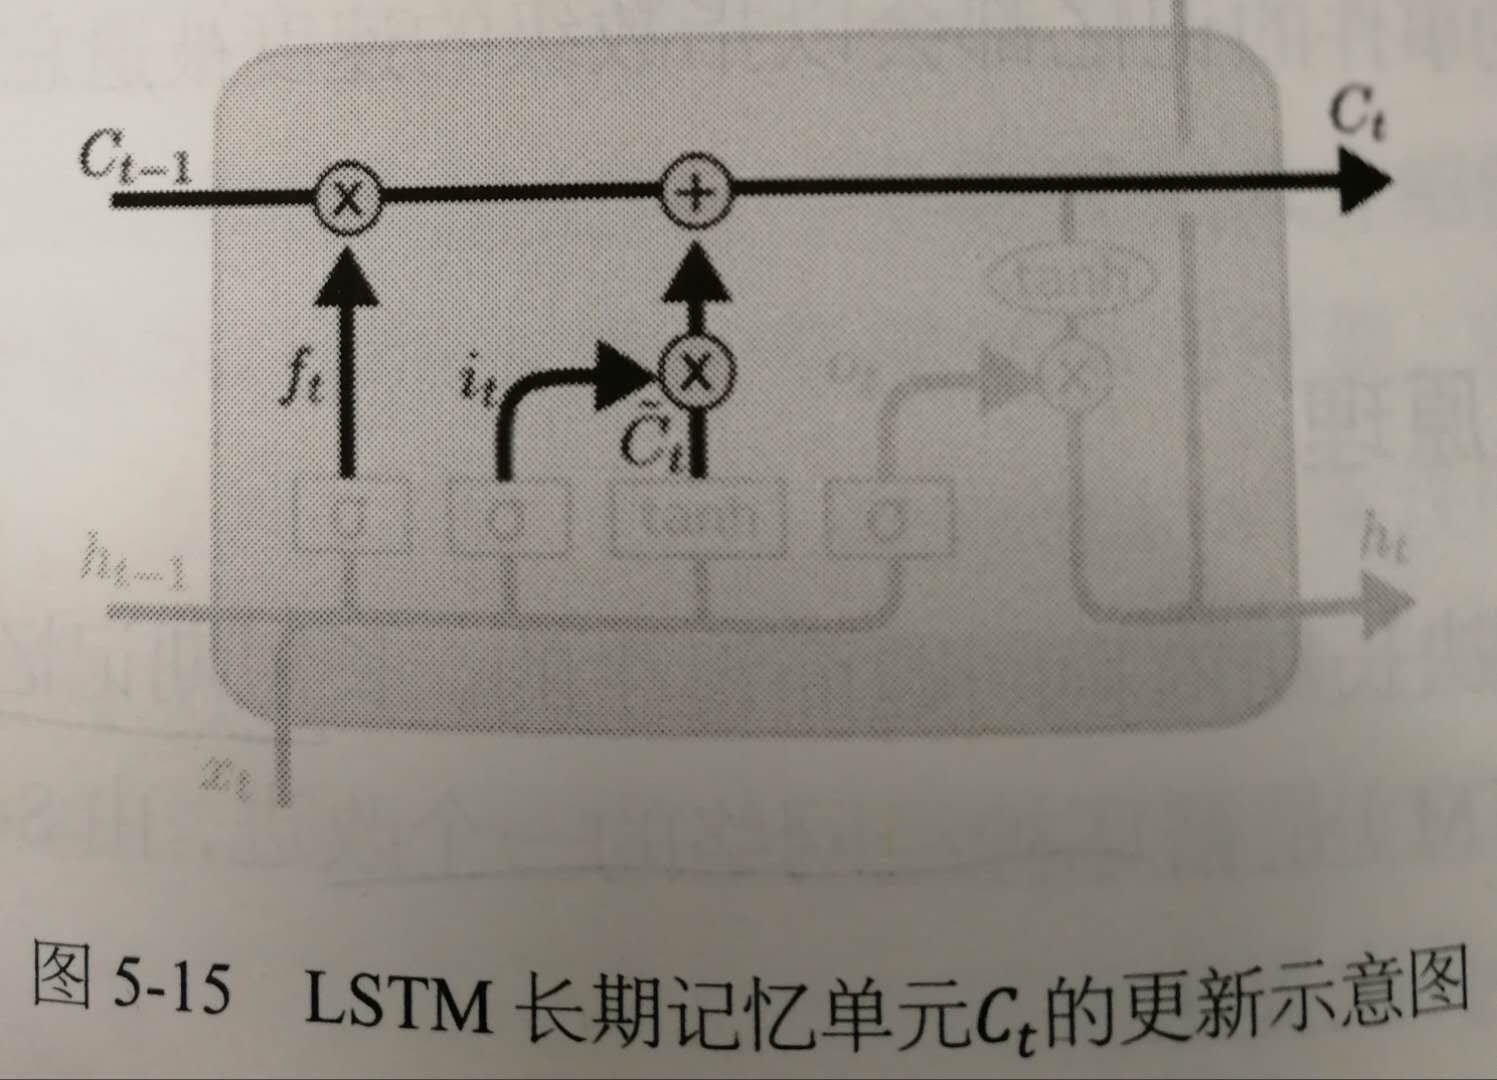

长记忆单元,公式表示为:$$C_t=f_t\times C_t+i_t\times \tilde{C_t}$$  $$f_t=\sigma (W_t\cdot [h_{t-1},x_t]+b_f)$$  $$i_t=\sigma (W_i\cdot [h_{t-1},x_t]+b_i)$$  $$\tilde{C_t}=tanh(W_c\cdot [h_{t-1},x_t]+b_C)$$
其中,$f_t,i_t$分别代表遗忘门和输入门,在每一时刻,遗忘门会控制上一时刻记忆的遗忘程度,输入门会控制新记忆$\tilde{C_t}$的写入长期记忆的程度.$f_t,i_t$和$\tilde{C_t}$都是与上一时刻的短记忆$h_{t-1}$和当前时刻输入$x_t$相关的函数.并且$f_t$和$i_t$是sigmold函数,所以取值范围为[0,1],$\tilde{C_t}$为tanh函数,取值范围为[-1,1].

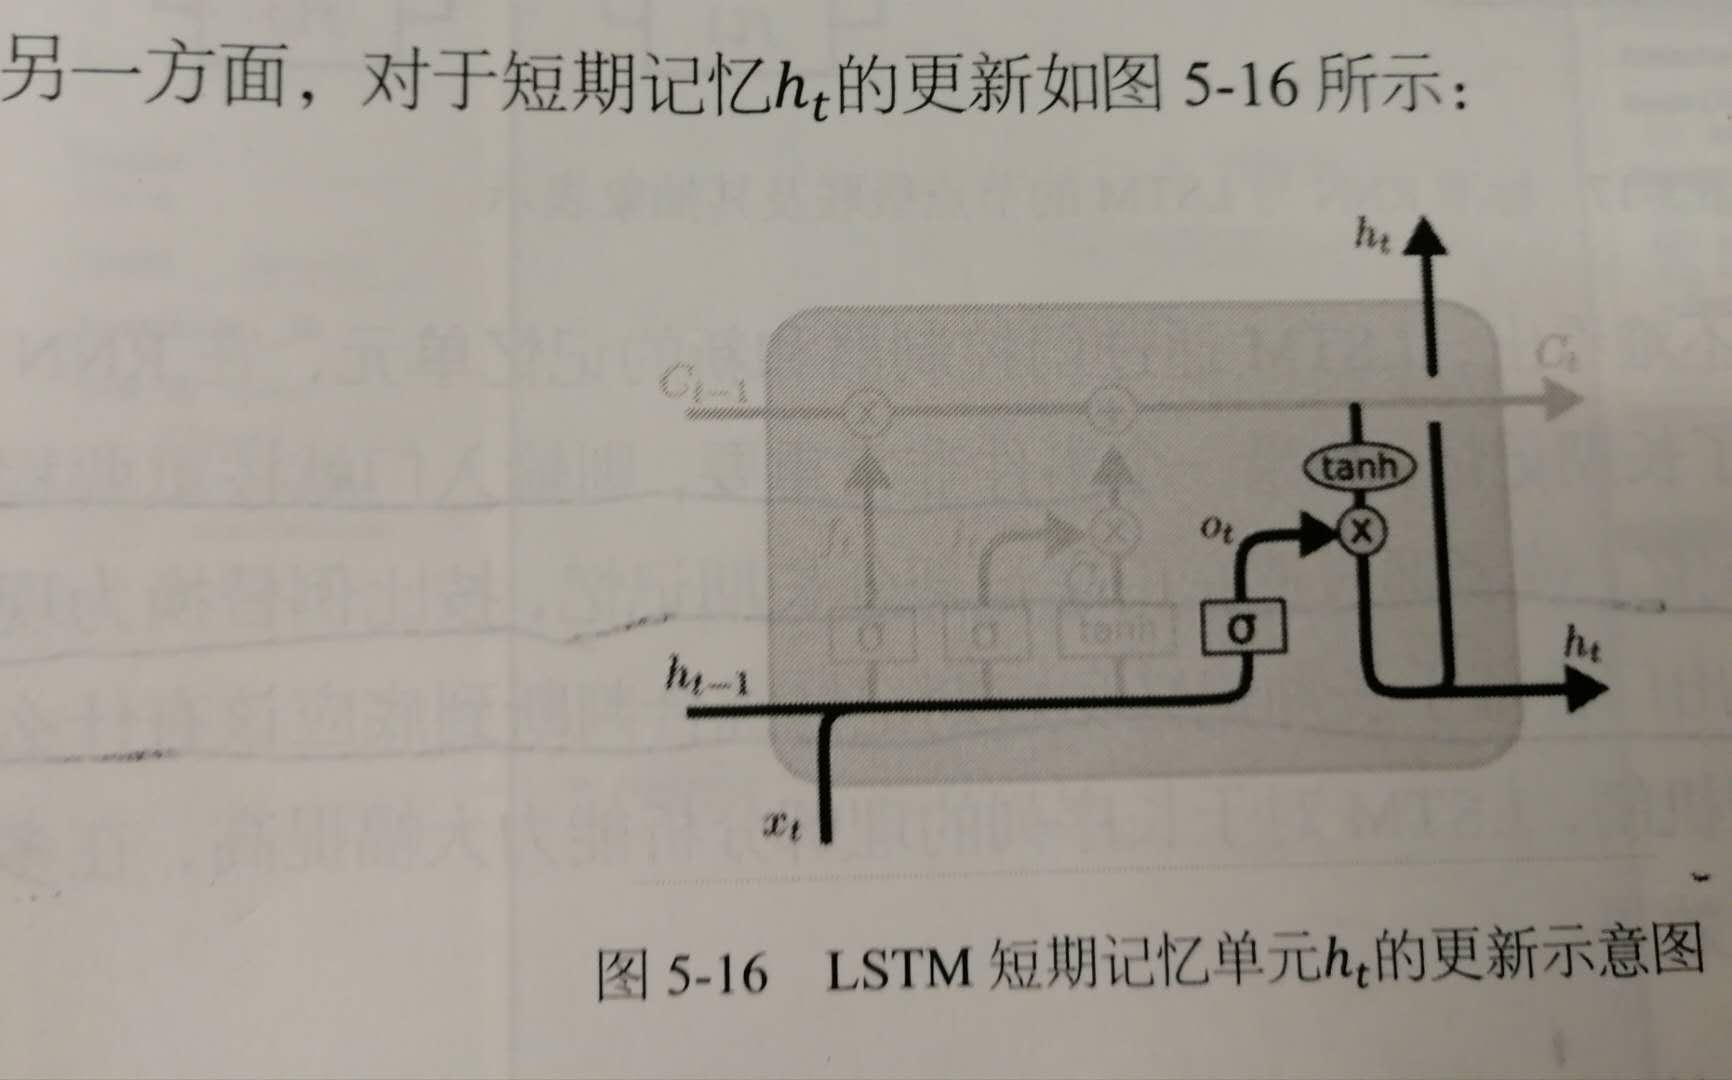
短记忆单位,公式表示为:$$h_t=o_t\times tanh(C_t)$$  $$o_t=\sigma(W_o*[h_{t-1},x_t]+b_o)$$
其中,$o_t$表示输出门,它控制着短期记忆如何受长期记忆影响.


LSTM对标准RNN的改进主要体现在通过门控制器增加了对不同时刻记忆的权重控制,以及加入跨层连接削减梯度消失问题的影响.LSTM实际上在原有结构上增加了线性连接,而不再是单纯的非线性连接叠加,这样能使长期信息更好地传播,这与深度残差网络ResNet通过增加跨层连接来消除梯度消失问题的影响在设计上有异曲同工之妙.
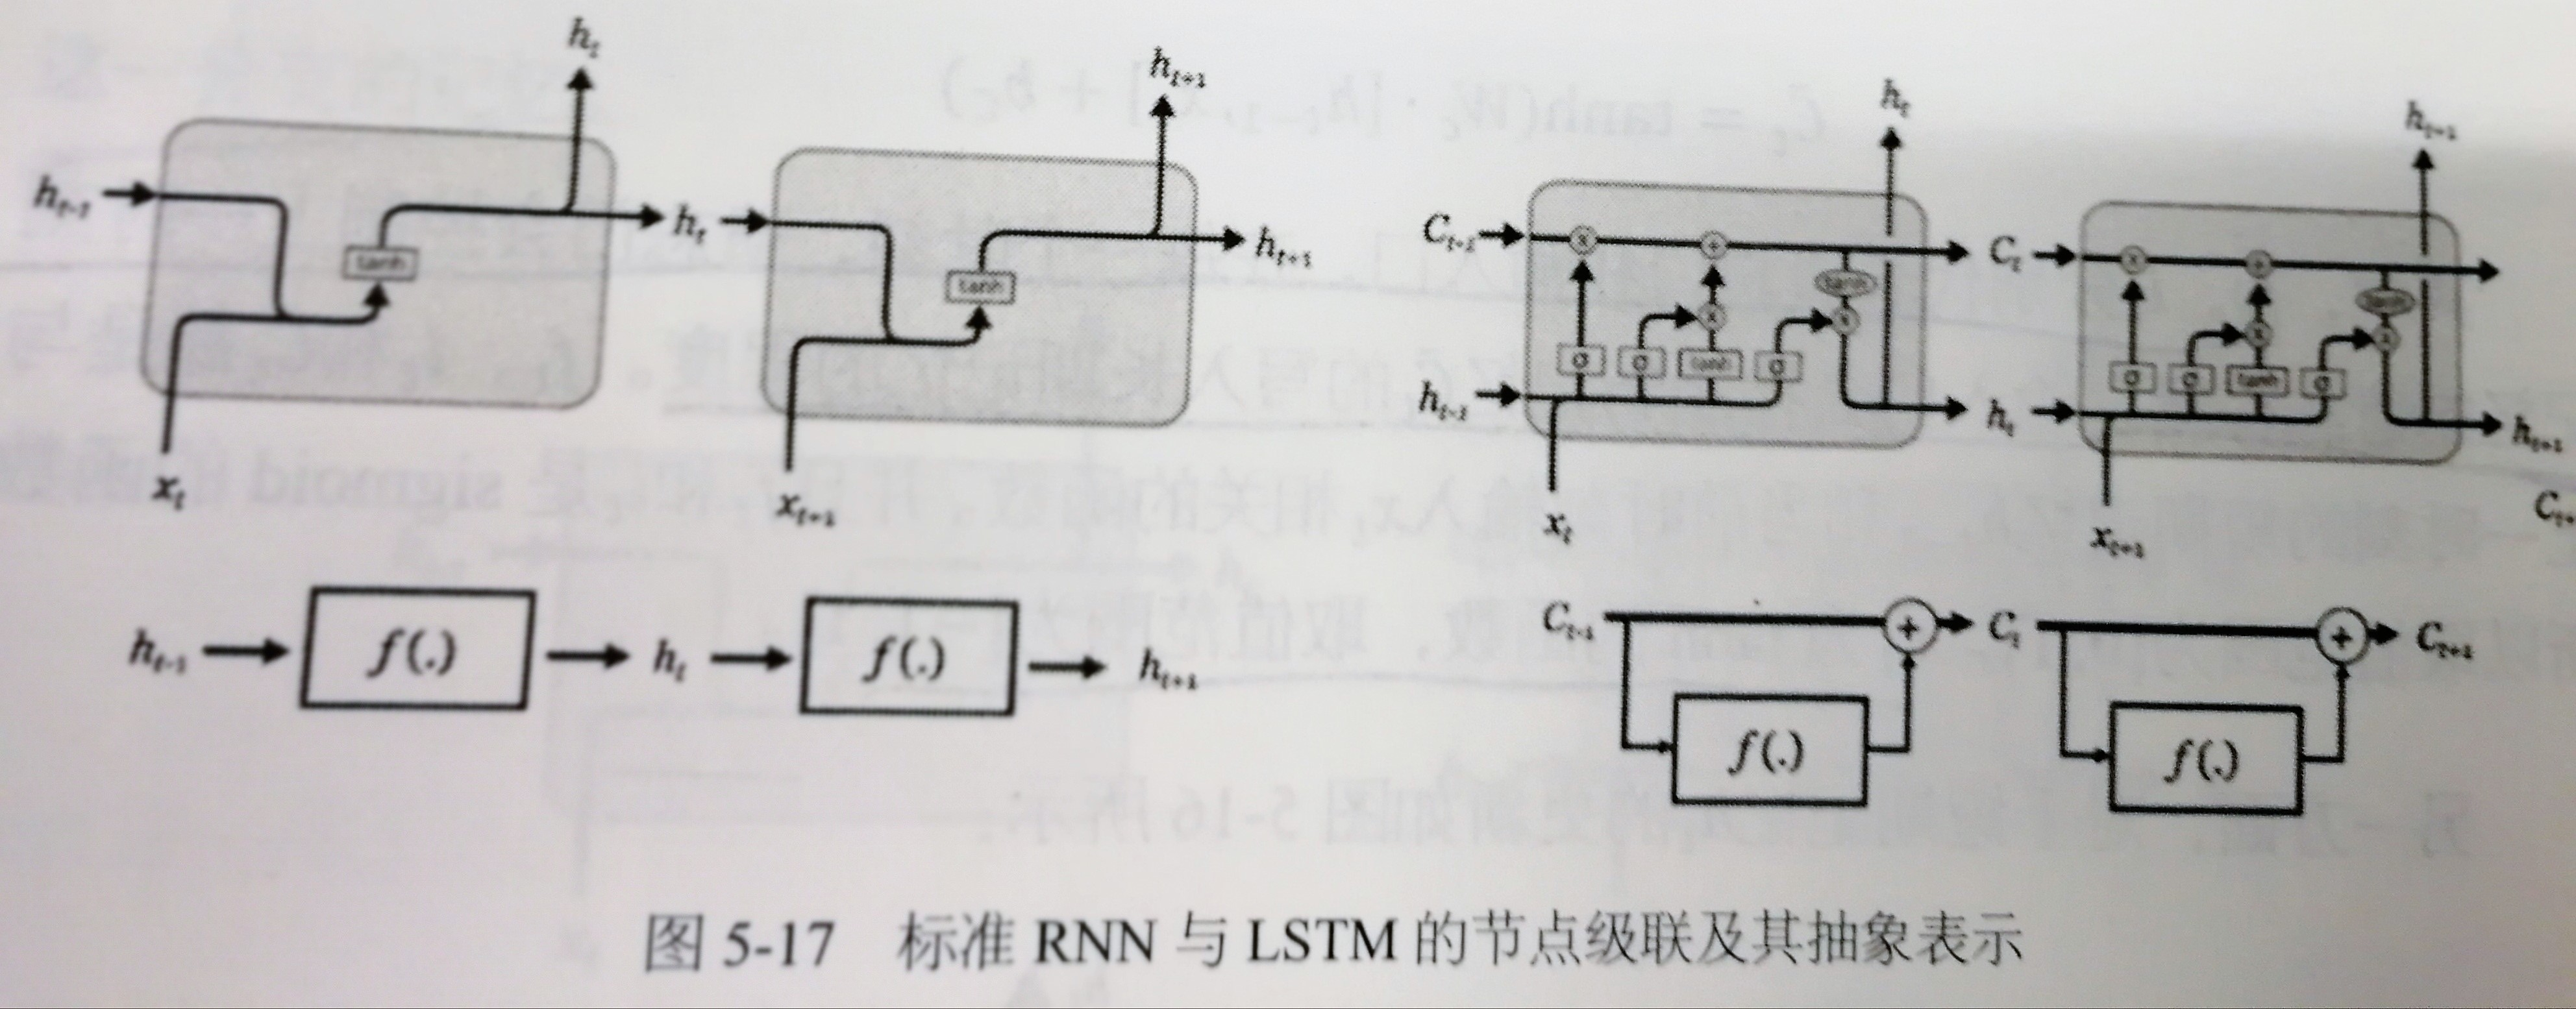
LSTM通过门控制器和新的记忆单元,在RNN原有的短期记忆之上保留了长期记忆.如果一个事件非常重要,则输入门就按重要程度将短期记忆合并进长期记忆,或者通过遗忘门忘记部分长期记忆,按比例替换为现在的新记忆,而在最后,输出门会基于长期记忆和短期记忆综合判断到底该有什么样的输出. 

In [81]:
import tensorflow as tf
from tensorflow.contrib import rnn
rnn.BasicLSTMCell?
#rnn.BasicLSTMCell(num_units, forget_bias=1.0, state_is_tuple=True, activation=None, reuse=None, name=None)
#We add forget_bias (default: 1) to the biases of the forget gate in order to
#reduce the scale of forgetting in the beginning of the training.
#It does not allow cell clipping, a projection layer, and does not
#use peep-hole connections: it is the basic baseline.

#state_is_tuple: If True, accepted and returned states are 2-tuples of
#the `c_state` and `m_state`.  If False, they are concatenated



tensorflow中对LSTM实现了两种基本算子，一个是基础的BasicLSTMCell,实现了基础的LSTM层.另一个是完整版的LSTMCell,它在原始LSTM的基础上,加入对peehole
连接的支持,加入peehole连接的LSTM如图,peehole连接的作用是在输入\遗忘\输出控制器处理之前,加入了对长期记忆的依赖.
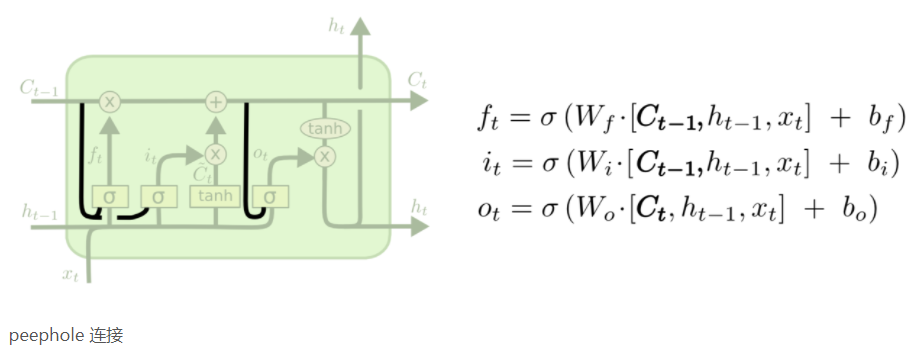

tensorflow中原生支持的另一个LSTM变体是GRU(Gated Recurrent Unit),对应代码的类名为GRUcell,其主要特点是简化了节点状态和门单元设计,从LSTM的遗忘门\输入门和输出门,减少为重置门(reset gate)和更新门(update gate),从而显著减少了模型的参数.在实践中,GRU和LSTM不相上下,但由于模型参数更少,在计算性能方面的优势较为明显.
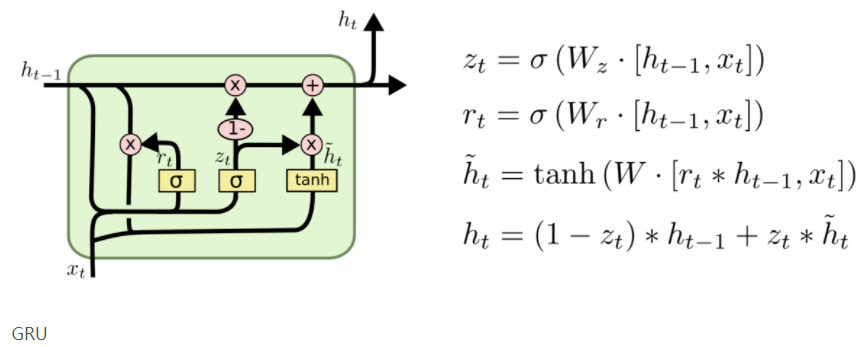

另一个重要的变体是coupled LSTM,不同于LSTM分开确定忘记的内容和添加的新信息,coupled LSTM是一同确定的.此时仅仅输入新值到那些已经忘记的救信息的那些状态里.
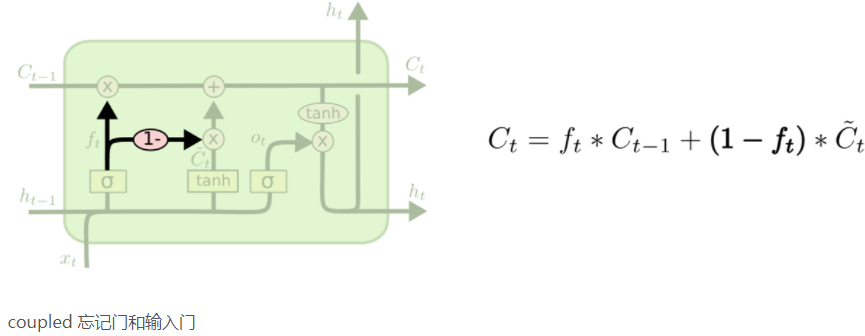

## Bidrectional RNN
普通RNN和LSTM都是要构建因果关系的结构,即当前时刻的输出依赖于之前的输入,但某些情况下,如语音识别方面,需要根据后续序列的识别结果,确定当前的输出.双向循环神经网络激素解决此类问题的方法,其核心思想是,每一个训练序列向前向后分别是两个RNN，且连着一个输出层．这个结构提供给输出层输入序列中每一个点的完整上下文信息，下图展示的是一个沿着时间展开的双向循环神经网络。六个独特的权值在每一个时步被重复的利用，六个权值分别对应：输入到向前和向后隐含层（w1, w3），隐含层到隐含层自己（w2, w5），向前和向后隐含层到输出层（w4, w6）。值得注意的是：向前和向后隐含层之间没有信息流，这保证了展开图是非循环的。
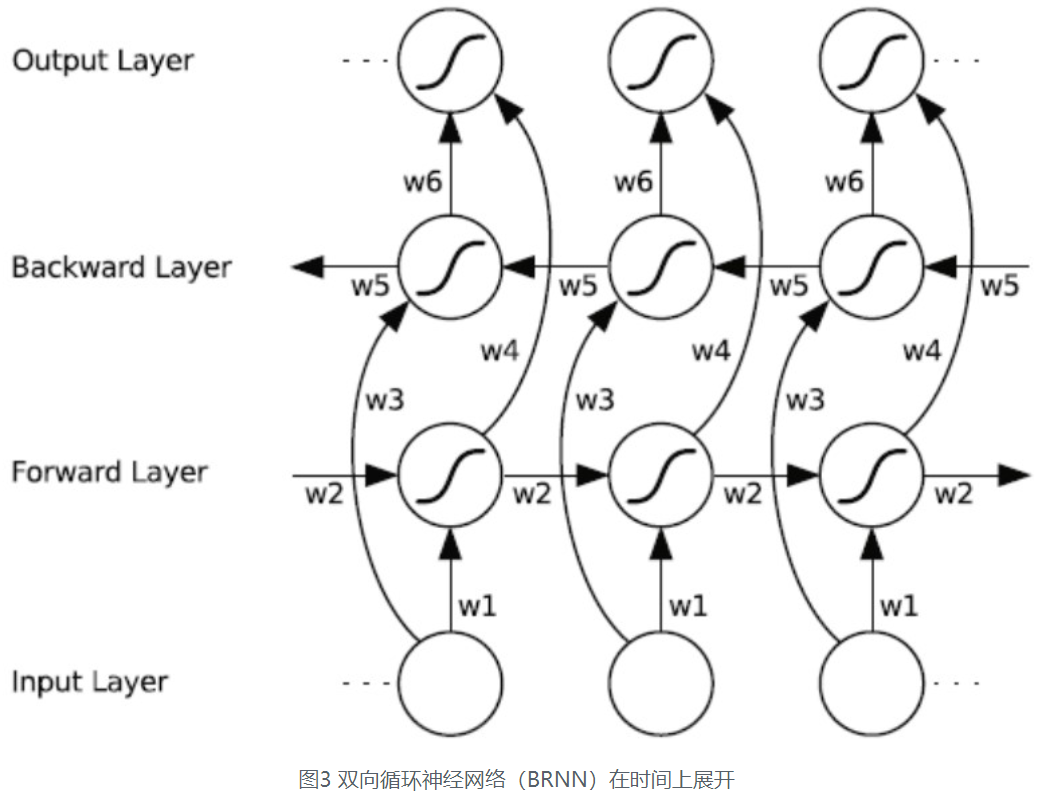

## DRNN
RNN的另一个变体是深度循环网络(DRNN),其主要思路是将每个时刻的处理过程加深,将多个节点堆叠在一个时刻计算中,以加深非线性变换的复杂程度.
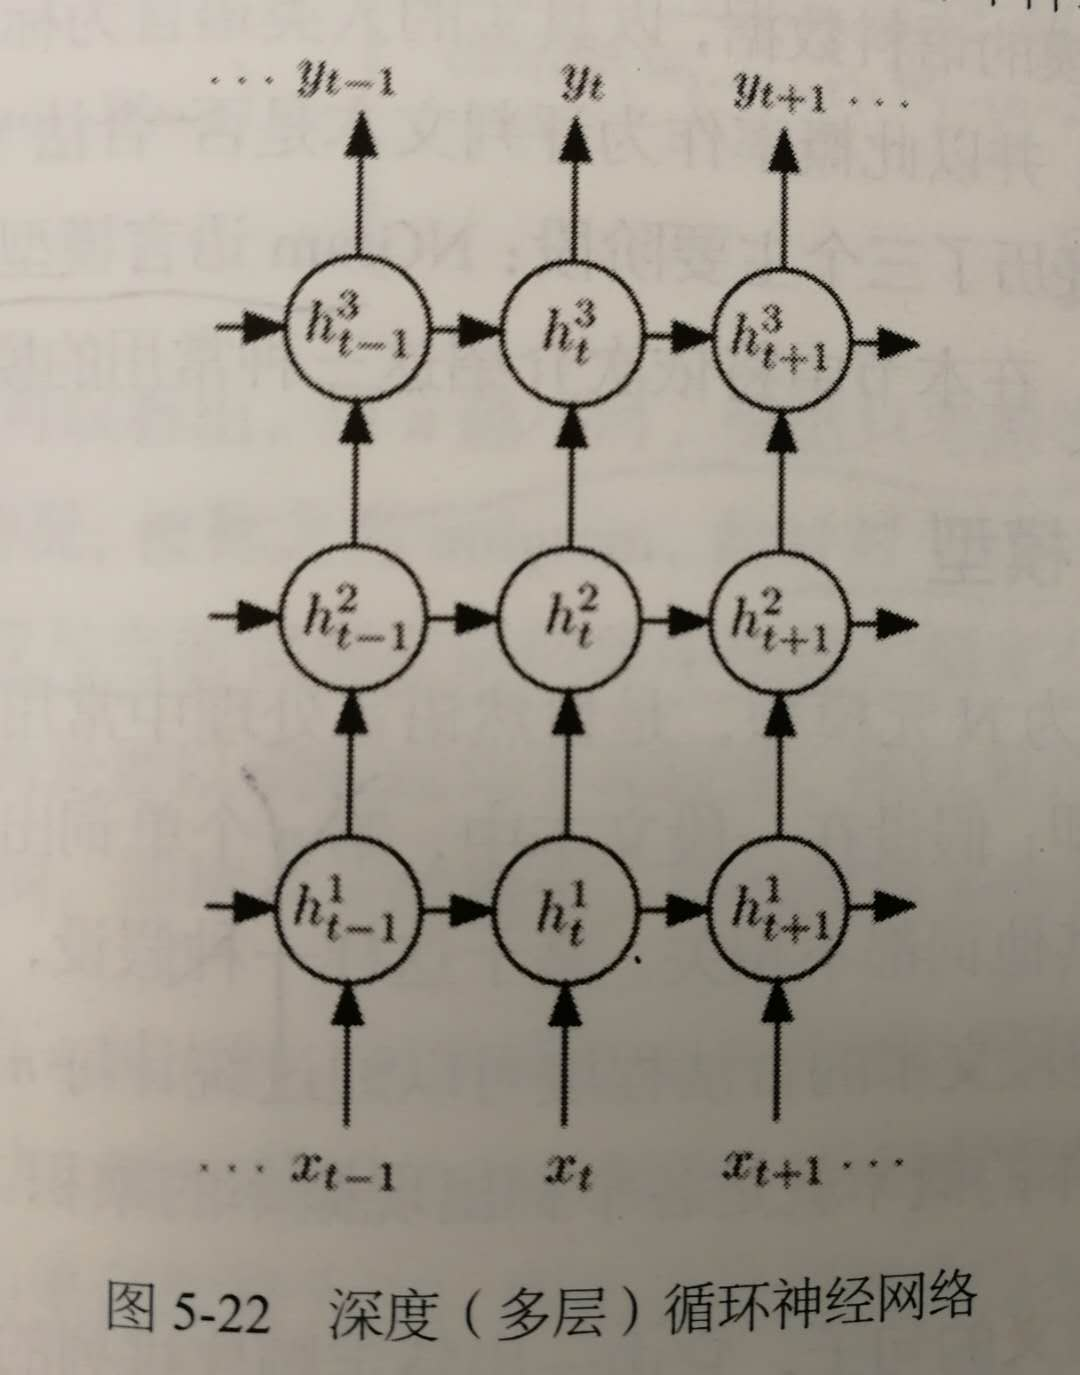

Grid LSTM

Attention 模型

## 语言模型
http://www.flickering.cn/nlp/2015/03/%E6%88%91%E4%BB%AC%E6%98%AF%E8%BF%99%E6%A0%B7%E7%90%86%E8%A7%A3%E8%AF%AD%E8%A8%80%E7%9A%84-3%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E8%AF%AD%E8%A8%80%E6%A8%A1%E5%9E%8B/
语言模型就是用于评估文本符合使用习惯程度的模型.以统计学为基础的统计语言模型是目前评估文本质量的主要方法,统计语言模型是基于预先收集的大规模的预料数据,以真实的人类语言为标准,预测文本序列在语料库中可能出现的概率,并以此概率作为评判文本是否合法的指标,统计语言模型大致经历了三个主要阶段:NGram模型,神经网络语言模型,循环神经网络模型.

### NGram模型
NGram模型又称N元模型,该模型基于马尔科夫假设:在一段文本中,某个单词出现的概率只与前面n-1个词相关,而与其它词不相关.基于这一假设,可以评估文本中每一个词出现的概率,那么整段文本的合法程度可以通过统计每n个词在语料库中出现的可能性来评估,整段文本的概率就是各个词出现概率的乘积.
假定s是一个有意义的句子,它由一串特定顺序排列的词$(w_1,w_2,...,w_m)$组成,m表示句子的长度,即单词的个数.则$$P(s)=p(w_1,w_2,...,w_m)=p(w_1)\times
p(w_2|w_1)\times p(w_3|w_2,w_1)\times ....\times p(w_m|w_1,...,w_{m-1})$$,由于每一个词至多与前面n-1个词有关,即$$p(w_i|w_1,w_2,...,w_{i-1})=\begin{cases}p(w_i|w_1,...,w_{i-1},i<n \\ p(w_i|w_{i-(n-1)},...,w_{i-1}),i\ge n \end{cases}$$当整段文本长度m远远大于n时的概率计算可以简化为:$$p(s)=\prod_{i=1}^mp(w_i|w_1,...w_{i-1})\approx \prod_{i=n}^mp(w_i|w_{i-(n-1)},...,w_{i-1})$$,对于每一个词出现的条件概率,可以通过在语料库中统计计数的方式得到.其中,$count(w_{i-(n-1)},...,w_i)$表示字符串$w_{i-(n-1)},...,w_{i-1}$出现在语料库中的次数.$$P(w_{i-(n-1)},...,w_{i-1})=\begin{cases}\frac{count(w_{i-(n-1)},...,w_{i-1},w_i)}{count(w_{i-(n-1)},...,w_{i-1})},& n>1\\ \frac{count(w_i)}{\sum_j{count(w_j)}},& n=1 \end{cases}$$当n越小时,模型只考虑邻近词语之间的关系.越大时,越需要考虑上下文之间的关系.但随着随着n的增大,语言模型的参数越多而无法估计.同时,除非有海量的各种类型的语料数据,否则大量的n元组合都不曾在训练语料中出现过,依据最大似然估计得到的概率将会是0,也就是模型可能仅仅能计算寥寥几个句子.对于这样的情况,学者们提出了多种不同的平滑方案,如Add One Smoothing, Good-Turning Smoothing, Katz's back-off Smoothing, 插值模型.
### 神经网络语言模型
Ngram模型的缺陷:1),由于数据稀疏性导致估算能力有限;2),不能区分近义词.
Yoshua Bengio等人于2003年通过引入词向量概念,提出了Neural Network Language Model,NNLM.
词向量的概念是用向量表示一个词,最典型的词向量是one-hot编码,若词表中包含4000个词,则每一个单词都会编码为一个长度为4000的向量,并且只有一个元素的值为1.one-hot编码最主要的问题是任意两个词之间都是孤立的,在语义上无法建立联系.
另一种方式是特征向量表示法,可以使用一个2层全连接神经网络法建立联系.词向量为神经网络的一类参数,可以通过训练得到,同时基于词向量可以表示词序列$w_1^t$的联合分布.为了得到词向量,我们需要在给定训练数据集的情况下,训练得到目标模型$f(w_t,...,w_{t-(n-1)})=P(w_t|w_t^{t-(n-1)})$,词表中任意单词$w_i$表示为词向量,由此构建了一个m*|V|的矩阵C,其中m为词向量长度,|V|为词表规模.词的概率可以通过C进行变换得到,函数g是组合上下文词向量$(C(w_{t-(n-1)}),...,C(w_{t-1}))$构建一个词$w_t$的条件分布,即函数g为一个向量,其第i个分量表示当前词$w_t$等于第i个词$V_i$的条件概率$P(w_t=V_i|w_1^{t-1})$,函数f组合C和g得到最终输出结果.
模型采用的是线性结构,可直接在单词向量量化空间中使用 <font face='黑体',size=4,colour='bule'> 空间距离度量 </font>单词的词义相同程度,与常规的神经网络训练过程相比,整个神经网络的模型参数可以使用方差较小的均匀分布或高斯分布进行初始化.
神经网络语言模型的参数规模与词表规模|V|,上下文依赖程度n成线性增长,因此可以支持更长距离的上下文依赖.
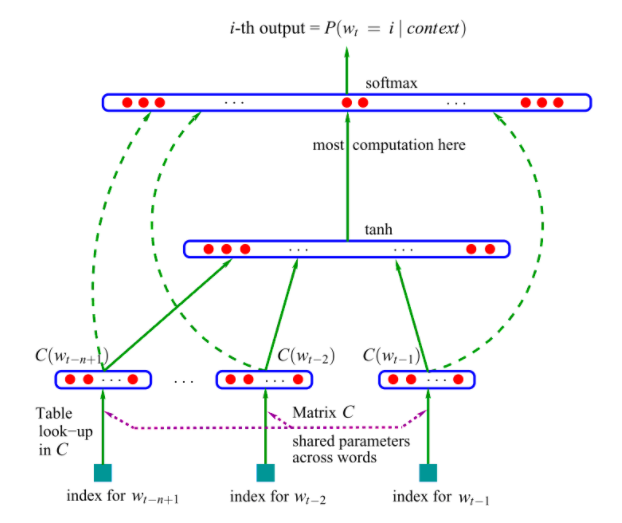
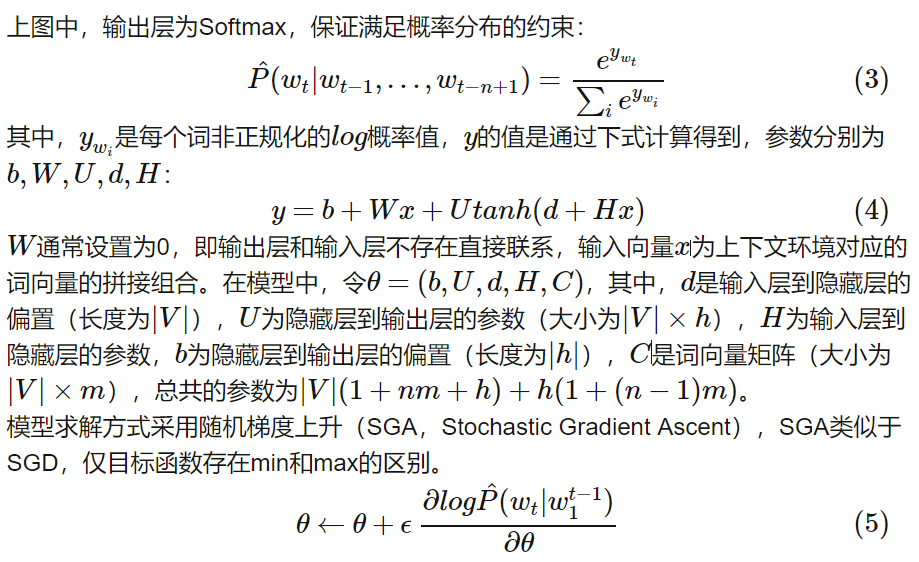

### 循环神经网络语言模型(RNNLM)
RNN最主要的特点是加入了'记忆'因素,在预测当前时间点的结果时,会依赖之前所产生的记忆,在语言模型中,通过引入RNN,可以消除掉n个词的窗口限制,,以全局上下文信息预测当前词的概率,相比普通前馈神经网络,RNN的参数共享可以大大减少模型的参数规模.
上文信息$(w_1,w_2...,w_{t-1})$通过循环神经网络编码$s_{t-1}$,是上一个隐藏层,代表着对上文的记忆.$s_{t-1}$与当前词语$w_t$相结合,可以得到$(w_1,...,w_t)$的表示$s_t$,通过编码得到预测的词向量.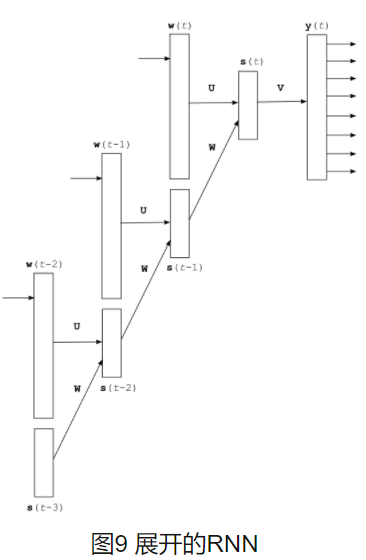

